In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import torch.nn.functional as F
from PIL import Image
import torchvision

In [3]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Dataset1Arq/Completo/')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=3, seed=41)

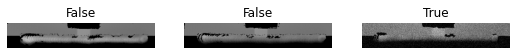

In [4]:
dls.show_batch()

In [5]:
conv_kwargs = {'kernel_size' : 3,'padding':1, 'bias': False}

In [23]:
imagen = Image.open(path)
imagen = tensor(imagen)
print(imagen.shape)
# trans = torchvision.transforms.ToTensor()
# imagen = trans(imagen)
# print(imagen.shape)


torch.Size([80, 480])


El shape del tensor es ([canales, alto, ancho])

In [24]:
xb, yb = dls.one_batch()
print(f'Entrada: {xb.shape}, Salida:{yb.shape}')

Entrada: torch.Size([3, 3, 80, 480]), Salida:torch.Size([3])


In [6]:
inp_stem = nn.Sequential(nn.Conv2d(3, 32, stride=2, **conv_kwargs),
                        nn.BatchNorm2d(32),
                        nn.ReLU(),
                        nn.Conv2d(32, 32, stride=1, **conv_kwargs),
                        nn.BatchNorm2d(32),
                        nn.ReLU(),
                        nn.Conv2d(32, 64, stride=1, **conv_kwargs),
                        nn.BatchNorm2d(64),
                        nn.ReLU(),
                        )

In [41]:
xb = xb.to(device='cpu')
#feature = inp_stem(imagen)
feature = inp_stem(xb)
# print(feature.shape)
# feature = feature[2][7]
# a_imagen = torchvision.transforms.ToPILImage()
# feature = a_imagen(feature)
# plt.imshow(feature)

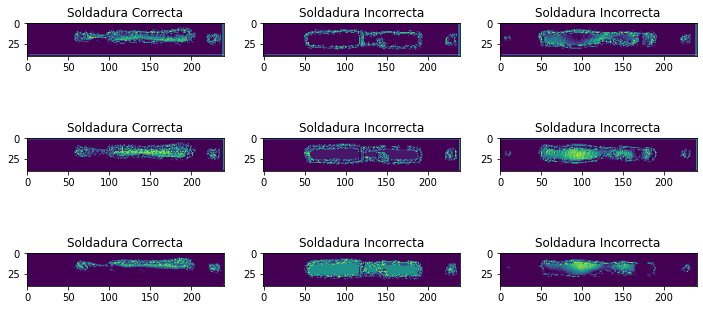

In [51]:

imagenes = []
f1 = 7
f2 = 9
f3 = 34

i1 = 0
i2 = 1
i3 = 2

imagenes.append(a_imagen(feature[i1][f1]))
imagenes.append(a_imagen(feature[i2][f1]))
imagenes.append(a_imagen(feature[i3][f1]))

imagenes.append(a_imagen(feature[i1][f2]))
imagenes.append(a_imagen(feature[i2][f2]))
imagenes.append(a_imagen(feature[i3][f2]))

imagenes.append(a_imagen(feature[i1][f3]))
imagenes.append(a_imagen(feature[i2][f3]))
imagenes.append(a_imagen(feature[i3][f3]))

columns = 3
rows = 3
ax = []
fig = plt.figure(figsize=(12,6))

#     for i in range(entrada.size()[0]):
#         imagenes.append(a_imagen(entrada[i][numeroFeature]))

for i in range(len(imagenes)):
    ax.append(fig.add_subplot(rows, columns, i+1))
#         if i%3==0:
#             if batch_cat[i%3] == 1:
#                 titulo = 'Soldadura Correcta' 
#             else: titulo = 'Soldadura Incorrecta' 
#         ax[i].title.set_text(titulo)
    plt.imshow(imagenes[i])

ax[0].title.set_text('Soldadura Correcta')
ax[1].title.set_text('Soldadura Incorrecta')
ax[2].title.set_text('Soldadura Incorrecta')

ax[3].title.set_text('Soldadura Correcta')
ax[4].title.set_text('Soldadura Incorrecta')
ax[5].title.set_text('Soldadura Incorrecta')

ax[6].title.set_text('Soldadura Correcta')
ax[7].title.set_text('Soldadura Incorrecta')
ax[8].title.set_text('Soldadura Incorrecta')


#plt.savefig('/home/yani/TFG-Memoria/img/resnet1.png', dpi=300)
plt.show()

In [7]:
class ResidualBlock(nn.Module):
    def __init__(self, canales_entrada, canales_salida, stride=1):
        super().__init__()
        self.canales_entrada = canales_entrada
        self.canales_salida = canales_salida
        self.operaciones = nn.Sequential(
            nn.Conv2d(canales_entrada, canales_salida, stride=stride, 
            kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(canales_salida),
            nn.ReLU(),
            nn.Conv2d(canales_salida, canales_salida, stride=1, 
            kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(canales_salida)
            )
        self.res = []


        if stride != 1:
            self.res = [nn.AvgPool2d(kernel_size = 2, stride=stride, ceil_mode=True)] + self.res

        if canales_entrada != canales_salida:
            self.res = self.res + [nn.Conv2d(canales_entrada, canales_salida,
            kernel_size=1, padding=0, bias=False),
            nn.BatchNorm2d(canales_salida)]


        self.res = nn.Sequential(*self.res)

    def forward(self, entrada):
        a = self.operaciones(entrada)
        b = self.res(entrada)
        return nn.ReLU()(a + b)

In [56]:

entrada_bloque = inp_stem(xb)
print(entrada_bloque.shape)

res = ResidualBlock(canales_entrada=64, canales_salida=128)
salida_bloque = res.forward(entrada_bloque)

# print(salida_bloque.shape)
# salida_bloque = a_imagen(salida_bloque[0][0])

# plt.imshow(salida_bloque)

torch.Size([3, 64, 40, 240])


In [58]:
entrada_fase3 = salida_bloque
salida_fase3 = fase3(entrada_fase2)

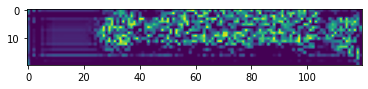

In [60]:
imagen = a_imagen(salida_fase3[0][1])

plt.imshow(imagen)

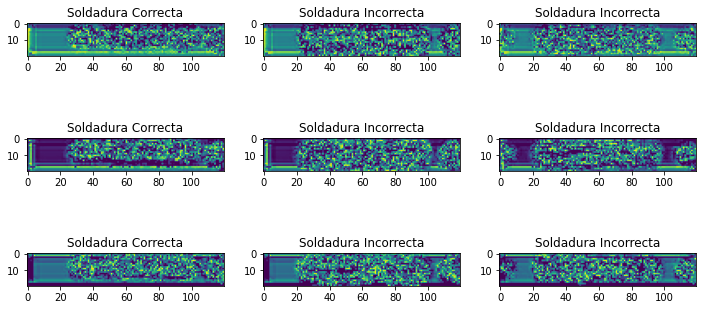

In [73]:

imagenes = []
f1 = 125
f2 = 212
f3 = 98

i1 = 0
i2 = 1
i3 = 2

imagenes.append(a_imagen(salida_fase3[i1][f1]))
imagenes.append(a_imagen(salida_fase3[i2][f1]))
imagenes.append(a_imagen(salida_fase3[i3][f1]))

imagenes.append(a_imagen(salida_fase3[i1][f2]))
imagenes.append(a_imagen(salida_fase3[i2][f2]))
imagenes.append(a_imagen(salida_fase3[i3][f2]))

imagenes.append(a_imagen(salida_fase3[i1][f3]))
imagenes.append(a_imagen(salida_fase3[i2][f3]))
imagenes.append(a_imagen(salida_fase3[i3][f3]))

columns = 3
rows = 3
ax = []
fig = plt.figure(figsize=(12,6))

#     for i in range(entrada.size()[0]):
#         imagenes.append(a_imagen(entrada[i][numeroFeature]))

for i in range(len(imagenes)):
    ax.append(fig.add_subplot(rows, columns, i+1))
#         if i%3==0:
#             if batch_cat[i%3] == 1:
#                 titulo = 'Soldadura Correcta' 
#             else: titulo = 'Soldadura Incorrecta' 
#         ax[i].title.set_text(titulo)
    plt.imshow(imagenes[i])

ax[0].title.set_text('Soldadura Correcta')
ax[1].title.set_text('Soldadura Incorrecta')
ax[2].title.set_text('Soldadura Incorrecta')

ax[3].title.set_text('Soldadura Correcta')
ax[4].title.set_text('Soldadura Incorrecta')
ax[5].title.set_text('Soldadura Incorrecta')

ax[6].title.set_text('Soldadura Correcta')
ax[7].title.set_text('Soldadura Incorrecta')
ax[8].title.set_text('Soldadura Incorrecta')


#plt.savefig('/home/yani/TFG-Memoria/img/resnet_fase3.png', dpi=300)
plt.show()

In [62]:
salida_fase3.size()

torch.Size([3, 256, 20, 120])

In [8]:
fase1 = nn.Sequential(ResidualBlock(64, 64, stride=1),
                      ResidualBlock(64, 64, stride=1),
                      ResidualBlock(64, 64, stride=1),
                      ResidualBlock(64, 64, stride=1))

fase2 = nn.Sequential(ResidualBlock(64, 128, stride=2),
                      ResidualBlock(128, 128, stride=1),
                      ResidualBlock(128, 128, stride=1),
                      ResidualBlock(128, 128, stride=1))

fase3 = nn.Sequential(ResidualBlock(128, 256, stride=2),
                      ResidualBlock(256, 256, stride=1),
                      ResidualBlock(256, 256, stride=1),
                      ResidualBlock(256, 256, stride=1),
                      ResidualBlock(256, 256, stride=1),
                      ResidualBlock(256, 256, stride=1))

fase4 = nn.Sequential(ResidualBlock(256, 512, stride= 2),
                      ResidualBlock(512, 512, stride=1),
                      ResidualBlock(512, 512, stride=1))
                      

[Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False), BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
[AvgPool2d(kernel_size=2, stride=2, padding=0), Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False), BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
[Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
[AvgPool2d(kernel_size=2, stride=2, padding=0), Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False), BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
[Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1), bias=False), BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
[AvgPool2d(kernel_size=2, stride=2, padding=0), Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1), bias=False), BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, 

In [14]:
fase1.cuda()
salida_fase1 = fase1(entrada_bloque.cuda())

In [16]:
fase1.to('cpu')

Sequential(
  (0): ResidualBlock(
    (operaciones): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (id): Sequential()
  )
  (1): ResidualBlock(
    (operaciones): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (id): Sequential()
  )
  (2): ResidualBlock(
    (operaciones): Sequential(
      (

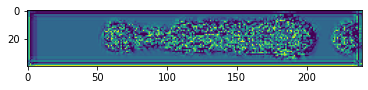

In [39]:
salida_fase1.shape
salida_imagen = salida_fase1
plt.imshow(a_imagen(salida_imagen[0][0]))

In [ ]:
from matplotlib.image import imread
salida_imagen2 = salida_fase2
plt.imshow(a_imagen(salida_imagen2[0][0]))


In [11]:
ResidualNetwork34 = nn.Sequential(
                     inp_stem,
                     nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
                     fase1,
                     fase2,
                     fase3,
                     fase4,
                     nn.AdaptiveAvgPool2d(1),
                     nn.Flatten(),
                     nn.Linear(512, 256),
                     nn.Linear(256,10),
                     nn.Linear(10,2)
)

In [12]:
def kaiming_init(m):
    if getattr(m, 'bias' , None) is not None:
        m.bias.data.zero_()
    if getattr(m, 'weight', None) is not None:
        if not isinstance(m, nn.BatchNorm2d):
            nn.init.kaiming_normal_(m.weight)
        for l in m.children():
            kaiming_init(1)

In [15]:
torch.cuda.empty_cache()
import gc
gc.collect()

19052

In [13]:
if torch.cuda.is_available():
    ResidualNetwork34.to(device= 'cuda')


In [14]:
kaiming_init(ResidualNetwork34)

In [15]:
precision = Precision()
f1 = F1Score()

In [19]:
learn = Learner(dls, ResidualNetwork34, metrics=[accuracy,precision,f1], opt_func=SGD)

SuggestedLRs(lr_min=6.918309954926372e-05, lr_steep=2.2908675418875646e-06)

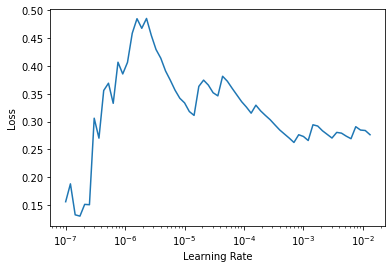

In [20]:
learn.lr_find()

In [21]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.184297,0.358088,0.866255,0.565714,0.603659,01:18
1,0.224891,0.254476,0.887860,0.608911,0.692958,01:18
2,0.214195,0.255739,0.912551,0.717949,0.724919,01:18
3,0.119537,0.144518,0.943416,0.922414,0.795539,01:18
4,0.046317,0.132362,0.967078,0.890323,0.896104,01:18
5,0.088215,0.063346,0.981481,0.965517,0.939597,01:18
6,0.032694,0.045827,0.985597,0.972789,0.953333,01:18
7,0.038589,0.039887,0.986625,0.943038,0.958199,01:18
8,0.008905,0.038573,0.987654,0.949045,0.961290,01:18
9,0.018976,0.039797,0.986625,0.948718,0.957929,01:18


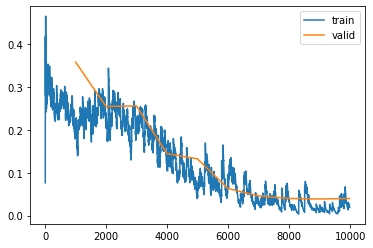

In [22]:
learn.recorder.plot_loss()

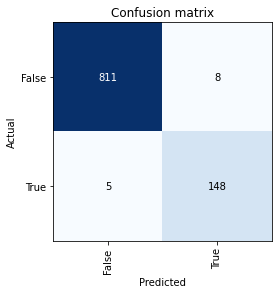

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=6.309573450380412e-07)

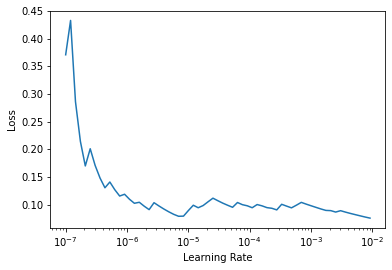

In [27]:
learn.lr_find()

In [26]:
learn.summary()

Sequential (Input shape: 9)
Layer (type)         Output Shape         Param #    Trainable 
                     9 x 32 x 40 x 240   
Conv2d                                    864        True      
BatchNorm2d                               64         True      
ReLU                                                           
Conv2d                                    9216       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     9 x 64 x 40 x 240   
Conv2d                                    18432      True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               1